In [1]:
print("""
@File         : predicting_market_movements_with_machine_learning.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-05-07 22:51:27
@Email        : cuixuanstephen@gmail.com
@Description  : 
""")


@File         : predicting_market_movements_with_machine_learning.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-05-07 22:51:27
@Email        : cuixuanstephen@gmail.com
@Description  : 



In [21]:
%cd ../../

d:\Quantitative\P4AT


In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams["figure.figsize"] = (10, 6)
plt.style.use("ggplot")
plt.rcParams["savefig.dpi"] = 300
os.environ["PYTHONHASHSEED"] = '0'

x = np.linspace(0, 10)
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)

set_seeds()
y = x+np.random.standard_normal(len(x))
reg = np.polyfit(x, y, deg=1)

In [5]:
reg

array([0.94612934, 0.22855261])

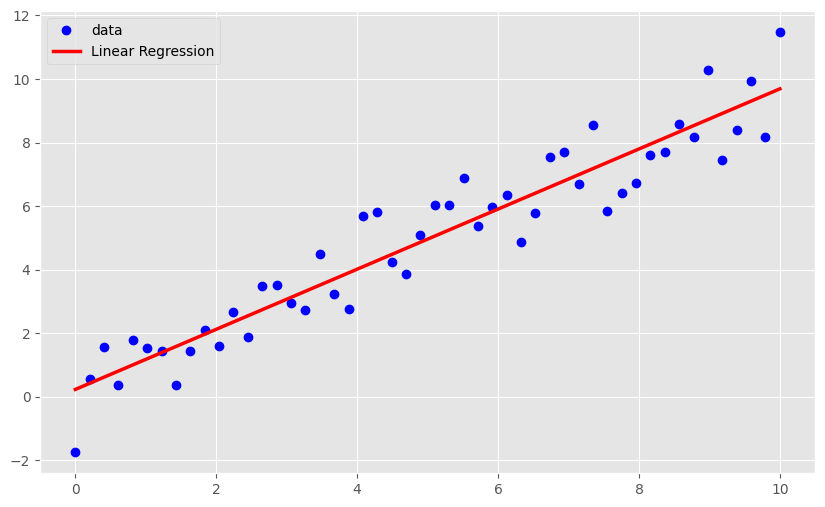

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, "bo", label="data")
plt.plot(x, np.polyval(reg, x), "r", lw=2.5, label="Linear Regression")
plt.legend(loc=0)

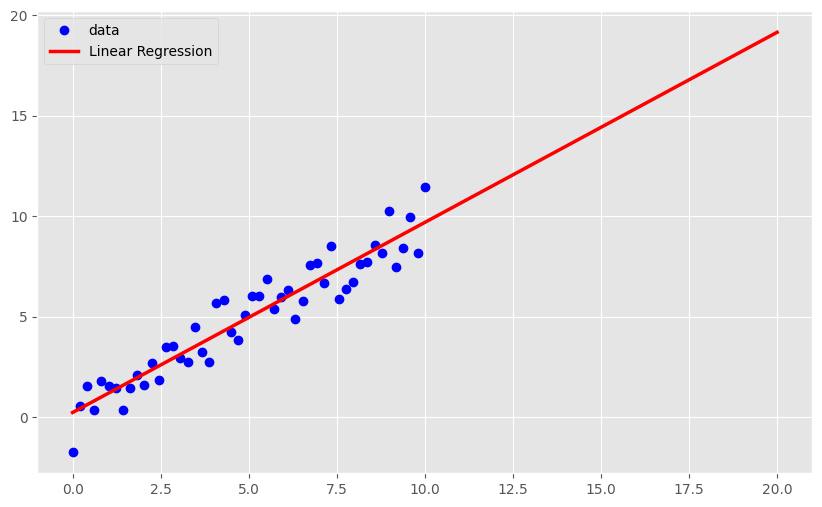

In [9]:
plt.figure()
plt.plot(x, y, "bo", label="data")
xn = np.linspace(0, 20)
plt.plot(xn, np.polyval(reg, xn), "r", lw=2.5, label="Linear Regression")
plt.legend(loc=0)

In [11]:
x = np.arange(12)
lags = 3

m = np.zeros((lags + 1, len(x) - lags))
m[lags] = x[lags:]
for i in range(lags):
    m[i] = x[i : i - lags]

In [12]:
m

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

In [14]:
reg = np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)[0]

In [16]:
np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)

(array([-0.66666667,  0.33333333,  1.33333333]),
 array([], dtype=float64),
 2,
 array([2.94834317e+01, 1.93060965e+00, 1.69780584e-16]))

In [17]:
reg

array([-0.66666667,  0.33333333,  1.33333333])

In [20]:
np.dot(m[:lags].T, reg)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [22]:
import pandas as pd

In [23]:
raw = pd.read_csv(
    "data/pyalgo_eikon_eod_data.csv", index_col=0, parse_dates=True
).dropna()

In [24]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [25]:
symbol = "EUR="
data = pd.DataFrame(raw[symbol])
data.rename(columns={symbol: "price"}, inplace=True)

In [26]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = f"lag_{lag}"
    data[col] = data["price"].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [27]:
reg = np.linalg.lstsq(data[cols], data["price"], rcond=None)[0]

In [28]:
reg

array([ 0.98635864,  0.02292172, -0.04769849,  0.05037365, -0.01208135])

<Axes: xlabel='Date'>

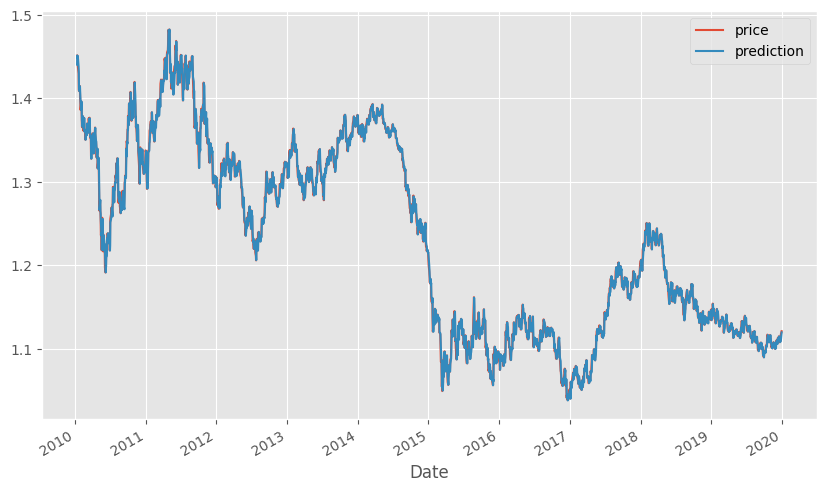

In [29]:
data["prediction"] = np.dot(data[cols], reg)
data[["price", "prediction"]].plot()

<Axes: xlabel='Date'>

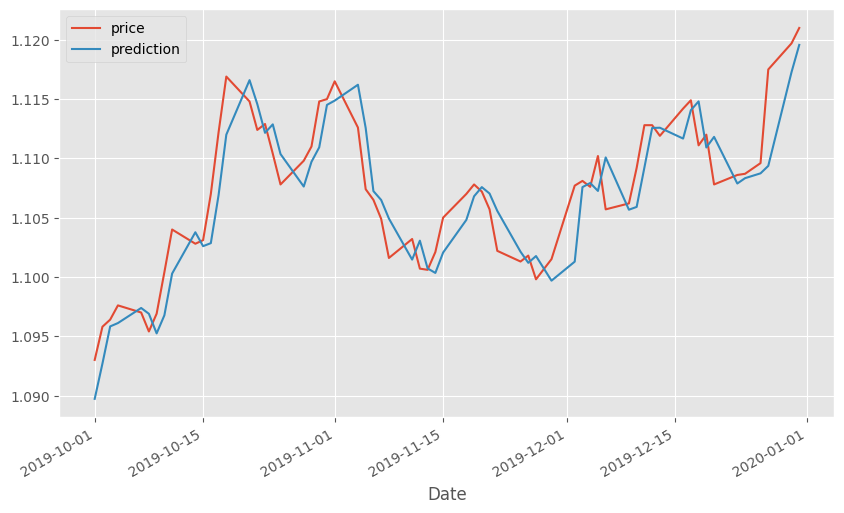

In [30]:
data[["price", "prediction"]].loc['2019-10-01':].plot()